<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [2]:

X = np.load('input/dataset/X.npy')
Y = np.load('input/dataset/Y.npy')

X.shape


(2062, 64, 64)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


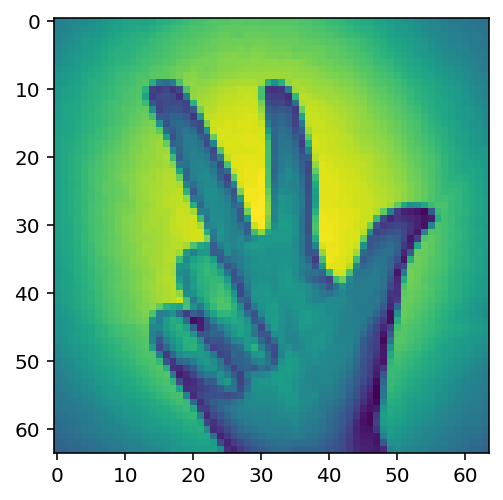

In [3]:
a = 1520
plt.imshow(X[a])
print(Y[a])

In [4]:
X_flat = np.array(X).reshape((2062, 64*64))
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.2, random_state=42)

In [5]:

from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=2, random_state=42) 
test =ICA.fit_transform(X_flat)


In [6]:
print (Y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [7]:
print(test)
test.shape

[[ 0.01247886 -0.03888162]
 [-0.00133718  0.01657341]
 [-0.00055514  0.02470191]
 ...
 [ 0.01869097 -0.00336495]
 [ 0.01133856 -0.02069272]
 [-0.04174855 -0.03600569]]


(2062, 2)

In [8]:
Y.shape

(2062, 10)

In [9]:
test_df = pd.DataFrame(data = test , columns = ['PC1', 'PC2'])

res = np.where(Y == 1)[1]
  
test_df['Y_values'] = pd.DataFrame(res)
 
test_df.describe()

,PC1,PC2,Y_values
count,2.062000e+03,2.062000e+03,2062.000000
mean,-8.157044e-07,-3.218029e-08,4.508729
std,2.202729e-02,2.202728e-02,2.869247
min,-9.136130e-02,-6.537340e-02,0.000000
25%,-3.287138e-03,-1.575239e-02,2.000000
50%,3.842535e-03,2.675068e-03,5.000000
75%,1.164802e-02,1.662988e-02,7.000000
max,4.526896e-02,6.109967e-02,9.000000


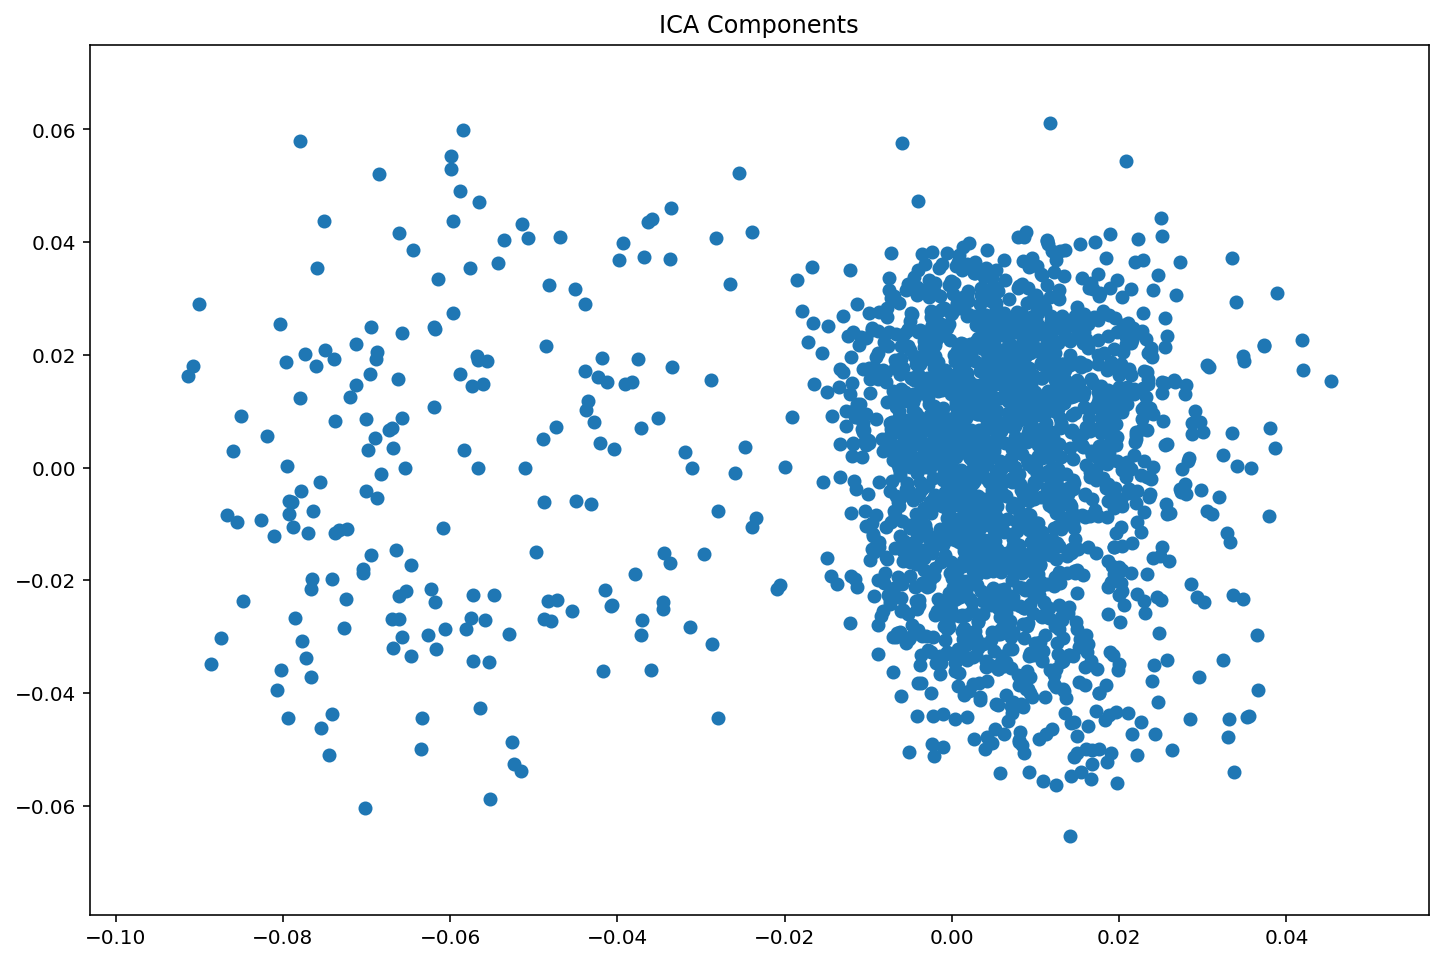

In [10]:
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(test[:,0], test[:,1])

In [11]:

sns.lmplot(x='PC1',y='PC2',
           data = test_df, 
           fit_reg = False, 
           hue='Y values',
           legend=True)


KeyError: "['Y values'] not in index"